In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
model=keras.Sequential(
    [
        layers.Conv2D(32,(3,3),activation='relu',padding="same",input_shape=(28,28,1)),
        layers.MaxPool2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(10,activation="softmax"),
    ]
)

In [29]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)



x_train,x_val=x_train[:50000],x_train[50000:]
y_train,y_val=y_train[:50000],y_train[50000:]

In [30]:
datagen=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False


)

In [38]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_1=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_val,y_val))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history_2=model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_val,y_val))


Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0205 - accuracy: 0.9938 - val_loss: 0.0739 - val_accuracy: 0.9816
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.0710 - val_accuracy: 0.9835
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0135 - accuracy: 0.9964 - val_loss: 0.0746 - val_accuracy: 0.9816
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.0790 - val_accuracy: 0.9812
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0807 - val_accuracy: 0.9816
Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3645 - accuracy: 0.9022 - val_loss: 0.1197 - val_accuracy: 0.9656
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2187 - accuracy: 0.9354 - val_loss: 0.0948 - val_accurac

In [32]:
model.evaluate(x_test,y_test)

model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9826


[0.06077791750431061, 0.9825999736785889]

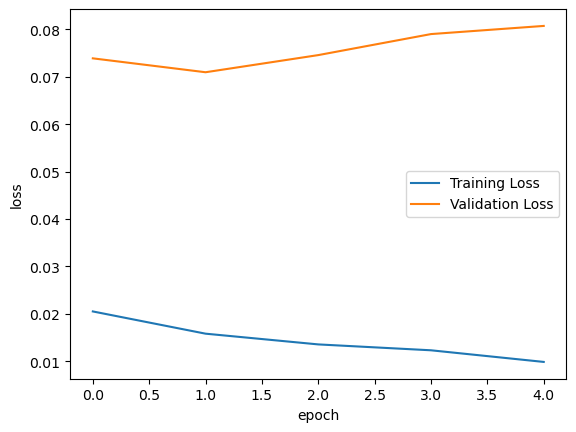

In [39]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['loss'],label="Training Loss")
plt.plot(history_1.history['val_loss'],label="Validation Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()
